In [25]:
import sqlite3
con = sqlite3.connect("CLU18_1M.db")
cursor = con.cursor()

In [43]:
import pandas as pd
df = pd.read_sql("SELECT * FROM candles where day > '20180710' order by dt", con, index_col='dt')
# df = pd.read_sql("SELECT * FROM candles where day > '20180710' order by dt", con, index_col='dt', parse_dates={'dt'})

In [44]:
df.head()

,open,high,low,close,volume,day
dt,,,,,,
20180711070000,72.67,72.76,72.67,72.70,25,20180711
20180711070100,72.70,72.70,72.70,72.70,6,20180711
20180711070200,72.70,72.70,72.67,72.67,6,20180711
20180711070300,72.67,72.71,72.67,72.71,10,20180711
20180711070400,72.70,72.70,72.70,72.70,1,20180711


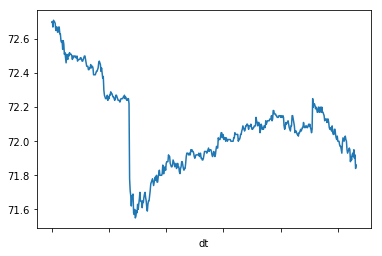

In [64]:
df.loc['20180711070000':'20180711170000'].close.plot()

In [6]:
from bokeh.plotting import figure, show, output_notebook
output_notebook()

Loading BokehJS ...

In [40]:
from math import pi

import pandas as pd

from bokeh.plotting import figure, show, output_notebook
# from bokeh.sampledata.stocks import MSFT

output_notebook()

# df = pd.DataFrame(MSFT)[:50]
df["date"] = df.index

inc = df.close > df.open
dec = df.open >= df.close
# w = 12*60*60*1000 # half day in ms
w = 30*1000

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, title = "MSFT Candlestick")
# p.xaxis.major_label_orientation = pi/4
# p.grid.grid_line_alpha=0.3

p.segment(df.date, df.high, df.date, df.low, color="black")
p.vbar(df.date[inc], w, df.open[inc], df.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(df.date[dec], w, df.open[dec], df.close[dec], fill_color="#F2583E", line_color="black")


show(p)  # open a browser

Loading BokehJS ...

In [14]:
df.head()

,open,high,low,close,volume,day,date
dt,,,,,,,
2018-07-11 07:00:00.000000,74.20,74.26,74.18,74.25,255,20180711,2018-07-11 07:00:00.000000
2018-07-11 07:01:00.000000,74.25,74.26,74.22,74.23,133,20180711,2018-07-11 07:01:00.000000
2018-07-11 07:02:00.000000,74.23,74.23,74.17,74.17,88,20180711,2018-07-11 07:02:00.000000
2018-07-11 07:03:00.000000,74.18,74.21,74.17,74.21,80,20180711,2018-07-11 07:03:00.000000
2018-07-11 07:04:00.000000,74.20,74.22,74.20,74.22,67,20180711,2018-07-11 07:04:00.000000


In [20]:
df.open.dtype

dtype('float64')

In [24]:
df.dtypes

open      float64
high      float64
low       float64
close     float64
volume      int64
day        object
dtype: object